In [1]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set correct datatypes for the different columns

import pandas as pd
import numpy as np
from unidecode import unidecode

# Complete list of columns based on your specifications
columns = [
    "Brand", "dataset", "Date", "filename",
    "frequency_app0", "frequency_com", "frequency_dht", "frequency_dqt", "frequency_dri",
    "frequency_eoi", "frequency_sof0", "frequency_sof2", "frequency_soi", "frequency_sos",
    "ID", "marker_app0_0_data", "marker_app0_0_density_units", "marker_app0_0_identifier",
    "marker_app0_0_length", "marker_app0_0_version", "marker_app0_0_xdensity",
    "marker_app0_0_xthumbnail", "marker_app0_0_ydensity", "marker_app0_0_ythumbnail",
    "marker_com_0_cm", "marker_com_0_lc", "marker_dht_0_hs_0_lv", "marker_dht_0_hs_0_tc",
    "marker_dht_0_hs_0_th", "marker_dht_0_hs_1_lv", "marker_dht_0_hs_1_tc", "marker_dht_0_hs_1_th",
    "marker_dht_0_hs_2_lv", "marker_dht_0_hs_2_tc", "marker_dht_0_hs_2_th", "marker_dht_0_hs_3_lv",
    "marker_dht_0_hs_3_tc", "marker_dht_0_hs_3_th", "marker_dht_0_lh", "marker_dht_1_hs_0_lv",
    "marker_dht_1_hs_0_tc", "marker_dht_1_hs_0_th", "marker_dht_1_lh", "marker_dht_10_hs_0_lv",
    "marker_dht_10_hs_0_tc", "marker_dht_10_hs_0_th", "marker_dht_10_lh", "marker_dht_2_hs_0_lv",
    "marker_dht_2_hs_0_tc", "marker_dht_2_hs_0_th", "marker_dht_2_lh", "marker_dht_3_hs_0_lv",
    "marker_dht_3_hs_0_tc", "marker_dht_3_hs_0_th", "marker_dht_3_lh", "marker_dht_4_hs_0_lv",
    "marker_dht_4_hs_0_tc", "marker_dht_4_hs_0_th", "marker_dht_4_lh", "marker_dht_5_hs_0_lv",
    "marker_dht_5_hs_0_tc", "marker_dht_5_hs_0_th", "marker_dht_5_lh", "marker_dht_6_hs_0_lv",
    "marker_dht_6_hs_0_tc", "marker_dht_6_hs_0_th", "marker_dht_6_lh", "marker_dht_7_hs_0_lv",
    "marker_dht_7_hs_0_tc", "marker_dht_7_hs_0_th", "marker_dht_7_lh", "marker_dht_8_hs_0_lv",
    "marker_dht_8_hs_0_tc", "marker_dht_8_hs_0_th", "marker_dht_8_lh", "marker_dht_9_hs_0_lv",
    "marker_dht_9_hs_0_tc", "marker_dht_9_hs_0_th", "marker_dht_9_lh", "marker_dqt_0_lq",
    "marker_dqt_0_qs_0_pq", "marker_dqt_0_qs_0_tq", "marker_dqt_0_qs_1_pq", "marker_dqt_0_qs_1_tq",
    "marker_dqt_1_lq", "marker_dqt_1_qs_0_pq", "marker_dqt_1_qs_0_tq", "marker_dri_0_lr",
    "marker_dri_0_ri", "marker_sof0_0_frame_components", "marker_sof0_0_lf", "marker_sof0_0_nf",
    "marker_sof0_0_p", "marker_sof0_0_x", "marker_sof0_0_y", "marker_sof2_0_frame_components",
    "marker_sof2_0_lf", "marker_sof2_0_nf", "marker_sof2_0_p", "marker_sof2_0_x", "marker_sof2_0_y",
    "marker_sos_0_ah", "marker_sos_0_al", "marker_sos_0_ls", "marker_sos_0_ns", "marker_sos_0_scan_components",
    "marker_sos_0_se", "marker_sos_0_ss", "marker_sos_1_ah", "marker_sos_1_al", "marker_sos_1_ls",
    "marker_sos_1_ns", "marker_sos_1_scan_components", "marker_sos_1_se", "marker_sos_1_ss",
    "marker_sos_2_ah", "marker_sos_2_al", "marker_sos_2_ls", "marker_sos_2_ns", "marker_sos_2_scan_components",
    "marker_sos_2_se", "marker_sos_2_ss", "marker_sos_3_ah", "marker_sos_3_al", "marker_sos_3_ls",
    "marker_sos_3_ns", "marker_sos_3_scan_components", "marker_sos_3_se", "marker_sos_3_ss",
    "marker_sos_4_ah", "marker_sos_4_al", "marker_sos_4_ls", "marker_sos_4_ns", "marker_sos_4_scan_components",
    "marker_sos_4_se", "marker_sos_4_ss", "marker_sos_5_ah", "marker_sos_5_al", "marker_sos_5_ls",
    "marker_sos_5_ns", "marker_sos_5_scan_components", "marker_sos_5_se", "marker_sos_5_ss",
    "marker_sos_6_ah", "marker_sos_6_al", "marker_sos_6_ls", "marker_sos_6_ns", "marker_sos_6_scan_components",
    "marker_sos_6_se", "marker_sos_6_ss", "marker_sos_7_ah", "marker_sos_7_al", "marker_sos_7_ls",
    "marker_sos_7_ns", "marker_sos_7_scan_components", "marker_sos_7_se", "marker_sos_7_ss",
    "marker_sos_8_ah", "marker_sos_8_al", "marker_sos_8_ls", "marker_sos_8_ns", "marker_sos_8_scan_components",
    "marker_sos_8_se", "marker_sos_8_ss", "marker_sos_9_ah", "marker_sos_9_al", "marker_sos_9_ls",
    "marker_sos_9_ns", "marker_sos_9_scan_components", "marker_sos_9_se", "marker_sos_9_ss",
    "Model", "OS", "prov", "qtable_tq0", "qtable_tq1", "scene", "sequence_markers"
]

# Function to determine data type based on column name
def determine_dtype(column):
    if column.startswith("qtable_tq"):
        return "object"
    elif "frequency_" in column or any(suffix in column for suffix in [
        "_length", "_density_units", "_lr", "_ri", "_lc", "_tc", "_th", "_lh", "_se", "_ss", "_ah", "_al", "_ls", "_ns", "_lq", "_pq", "_tq", "_lf", "_nf", "_p", "_x", "_y"]):
        return "Int64"
    else:
        return "object"

# Build the dtype dictionary
dtype_dict = {col: determine_dtype(col) for col in columns}

df = pd.read_csv("/content/drive/MyDrive/Thesis_ML_stuff/floraview_forchheim.tsv", delimiter='\t', dtype=dtype_dict)


# Applying transliteration inline using lambda directly to object type columns
df[df.select_dtypes(include=[object]).columns] = df.select_dtypes(include=[object]).applymap(lambda x: unidecode(x) if isinstance(x, str) else x)


# combine marker_sof0_* columns with marker_sof2_* columns into marker_sof_

# List of suffixes
suffixes = ['frame_components', 'lf', 'nf', 'p', 'x', 'y']


# Create a new OS_major column
df['OS_major'] = df['OS'].apply(lambda x: x.split()[0] + ' ' + x.split()[1].split('.')[0])
sorted_unique_major_versions = np.sort(df['OS_major'].unique())

print("Major OS versions")
print(sorted_unique_major_versions)

# Creating the combined columns
for suffix in suffixes:
    col0 = f'marker_sof0_0_{suffix}'
    col2 = f'marker_sof2_0_{suffix}'
    new_col = f'marker_sof_{suffix}'
    df[new_col] = df[col0].combine_first(df[col2])

# Now, you can drop the old columns if they are no longer needed
df.drop(columns=[col for col in df if col.startswith('marker_sof0_') or col.startswith('marker_sof2_')], inplace=True)

# Sort dataframe by column names
df.sort_index(axis=1, inplace=True)

pd.set_option('display.max_info_columns', 200)

df.info()
df.describe()
#print(df.head())

Major OS versions
['Android 10' 'Android 11' 'Android 12' 'Android 4' 'Android 5'
 'Android 6' 'Android 7' 'Android 8' 'Android 9' 'iOS 12' 'iOS 13'
 'iOS 15' 'iOS 7']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29959 entries, 0 to 29958
Data columns (total 173 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    Brand                         29959 non-null  object 
 1    Date                          29959 non-null  object 
 2    ID                            29959 non-null  object 
 3    Model                         29959 non-null  object 
 4    OS                            29959 non-null  object 
 5    OS_major                      29959 non-null  object 
 6    dataset                       29959 non-null  object 
 7    filename                      29959 non-null  object 
 8    frequency_app0                22292 non-null  Int64  
 9    frequency_com                 570 non-null    Int64  
 1

,frequency_app0,frequency_com,frequency_dht,frequency_dqt,frequency_dri,frequency_eoi,frequency_sof0,frequency_sof2,frequency_soi,frequency_sos,...,marker_sos_8_ls,marker_sos_8_ns,marker_sos_8_se,marker_sos_8_ss,marker_sos_9_ah,marker_sos_9_al,marker_sos_9_ls,marker_sos_9_ns,marker_sos_9_se,marker_sos_9_ss
count,22292.0,570.0,29959.0,29959.0,2972.0,29958.0,14132.0,15827.0,29959.0,29959.0,...,11975.0,11975.0,11975.0,11975.0,8124.0,8124.0,8124.0,8124.0,8124.0,8124.0
mean,1.0,1.0,6.200274,1.65623,1.0,1.0,1.0,1.0,1.0,5.368837,...,8.0,1.0,63.0,7.110146,1.0,0.0,8.0,1.0,63.0,1.0
std,0.0,0.0,3.701981,0.474973,0.0,0.0,0.0,0.0,0.0,4.171903,...,0.0,0.0,0.0,8.874991,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,1.0,63.0,1.0,1.0,0.0,8.0,1.0,63.0,1.0
25%,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,1.0,63.0,1.0,1.0,0.0,8.0,1.0,63.0,1.0
50%,1.0,1.0,8.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,...,8.0,1.0,63.0,1.0,1.0,0.0,8.0,1.0,63.0,1.0
75%,1.0,1.0,10.0,2.0,1.0,1.0,1.0,1.0,1.0,10.0,...,8.0,1.0,63.0,20.0,1.0,0.0,8.0,1.0,63.0,1.0
max,1.0,1.0,11.0,2.0,1.0,1.0,1.0,1.0,1.0,10.0,...,8.0,1.0,63.0,20.0,1.0,0.0,8.0,1.0,63.0,1.0


In [4]:
#Feature engineering, add total number of markers

frequency_columns = df.filter(regex='^frequency_').columns
df['total_markers'] = df[frequency_columns].sum(axis=1)

In [5]:
# Set the dataset to use
dataset = 'Combined'

# Conditionally filter the DataFrame based on the value of 'dataset'
if dataset == 'Combined':
    df = df  # No filtering is applied
else:
    # Keep rows where the column 'Dataset' matches the 'dataset' variable
    df = df[df['dataset'] == dataset]

# Print the unique values in the 'Dataset' column after filtering
unique_values = df['dataset'].unique()
print("Unique values in the 'Dataset' column after filtering:")
print(unique_values)

Unique values in the 'Dataset' column after filtering:
['Floraview' 'Forchheim']


In [6]:
#removing informational features not used for training the model
#Date, dataset, filename, scene, ID
df = df.copy()
df.drop(['Date', 'dataset','filename','scene', 'ID'], axis=1, inplace=True)

In [7]:
# Print the number of unique values for each column

# Set display options to show more rows
pd.set_option('display.max_rows', None)  # None means no truncation

# Calculate the number of unique values for each column including NaN
unique_values = df.nunique(dropna=False)

# Sort the number of unique values in descending order
sorted_unique_values = unique_values.sort_values(ascending=False)

# Print the sorted number of unique values for each column
print("Number of unique values per column (sorted in descending order):")
print(sorted_unique_values)

Number of unique values per column (sorted in descending order):
marker_dht_3_hs_0_lv            18224
marker_dht_4_hs_0_lv            15809
marker_dht_5_hs_0_lv            14790
marker_dht_7_hs_0_lv            12806
marker_dht_6_hs_0_lv            12471
marker_dht_2_hs_0_lv            12366
marker_dht_8_hs_0_lv            10521
marker_dht_9_hs_0_lv             9161
marker_dht_1_hs_0_lv             2505
marker_dht_0_hs_0_lv              617
qtable_tq0                        484
marker_dht_10_hs_0_lv             282
marker_dht_5_lh                    72
marker_dht_4_lh                    70
marker_dht_1_lh                    69
marker_sof_y                       66
Model                              66
marker_dht_3_lh                    63
marker_dht_6_lh                    56
marker_sof_x                       56
marker_dht_2_lh                    50
qtable_tq1                         47
marker_dht_7_lh                    29
marker_dht_9_lh                    29
marker_dht_8_lh        

In [8]:
# Setting the target feature
target_feature = 'Brand'

# Check if target_feature is not 'prov' and then modify the DataFrame in place
if target_feature != 'prov':
    df.drop(df[df['prov'] != 'orig'].index, inplace=True)

# List of all possible features ('prov' is also possible but handled above)
possible_target_features = ['Brand', 'Model', 'OS', 'OS_major']

# Filter out the target feature from the list of possible features
features_to_drop = [feature for feature in possible_target_features if feature != target_feature]

# Drop the filtered features from the DataFrame
df.drop(features_to_drop, axis=1, inplace=True)



In [9]:
# Drop everything except established researched features
#df = df[['qtable_tq0', 'qtable_tq1', target_feature]]

In [10]:
# Drop constant columns

import pandas as pd

# Assuming 'df' is your DataFrame
# Detect constant columns, considering missing values as a unique value
constant_columns = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

# Sort the list of constant columns alphabetically
constant_columns.sort()

# Print constant columns in a more readable way
print("Constant columns (sorted alphabetically):")
for column in constant_columns:
    print(column)

# Print the total number of constant columns
print("Total number of constant columns:", len(constant_columns))

# Remove the constant columns from the DataFrame
if len(constant_columns) > 0:
  print("Dropping contant columns")
  df.drop(columns=constant_columns, inplace=True)

Constant columns (sorted alphabetically):
frequency_com
frequency_eoi
frequency_sof0
frequency_sof2
frequency_soi
frequency_sos
marker_app0_0_data
marker_com_0_cm
marker_com_0_lc
marker_dht_0_hs_0_lv
marker_dht_0_hs_0_tc
marker_dht_0_hs_0_th
marker_dht_10_hs_0_lv
marker_dht_10_hs_0_tc
marker_dht_10_hs_0_th
marker_dht_10_lh
marker_dht_4_hs_0_lv
marker_dht_4_hs_0_tc
marker_dht_4_hs_0_th
marker_dht_4_lh
marker_dht_5_hs_0_lv
marker_dht_5_hs_0_tc
marker_dht_5_hs_0_th
marker_dht_5_lh
marker_dht_6_hs_0_lv
marker_dht_6_hs_0_tc
marker_dht_6_hs_0_th
marker_dht_6_lh
marker_dht_7_hs_0_lv
marker_dht_7_hs_0_tc
marker_dht_7_hs_0_th
marker_dht_7_lh
marker_dht_8_hs_0_lv
marker_dht_8_hs_0_tc
marker_dht_8_hs_0_th
marker_dht_8_lh
marker_dht_9_hs_0_lv
marker_dht_9_hs_0_tc
marker_dht_9_hs_0_th
marker_dht_9_lh
marker_dqt_0_qs_0_pq
marker_dqt_0_qs_0_tq
marker_sof_lf
marker_sof_nf
marker_sof_p
marker_sos_0_ah
marker_sos_0_al
marker_sos_0_ls
marker_sos_0_ns
marker_sos_0_scan_components
marker_sos_0_se
marker_so

In [11]:
# Label encoding

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Label Encoding the entire DataFrame before splitting
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    # Convert NaN to 'Missing' and encode
    df[column] = le.fit_transform(df[column].astype('str').fillna('Missing'))
    label_encoders[column] = le

In [12]:
# The original placement of the Label encoding

In [13]:
# Shuffle the data
#df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
# Setting up the data
X = df.drop(target_feature, axis=1)
y = df[target_feature]

In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into a temporary training + validation set and a final test set
#X_train_val_temp, X_test, y_train_val_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Further split the temporary training + validation set into final training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train_val_temp, y_train_val_temp, test_size=0.5, random_state=42)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets equally
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



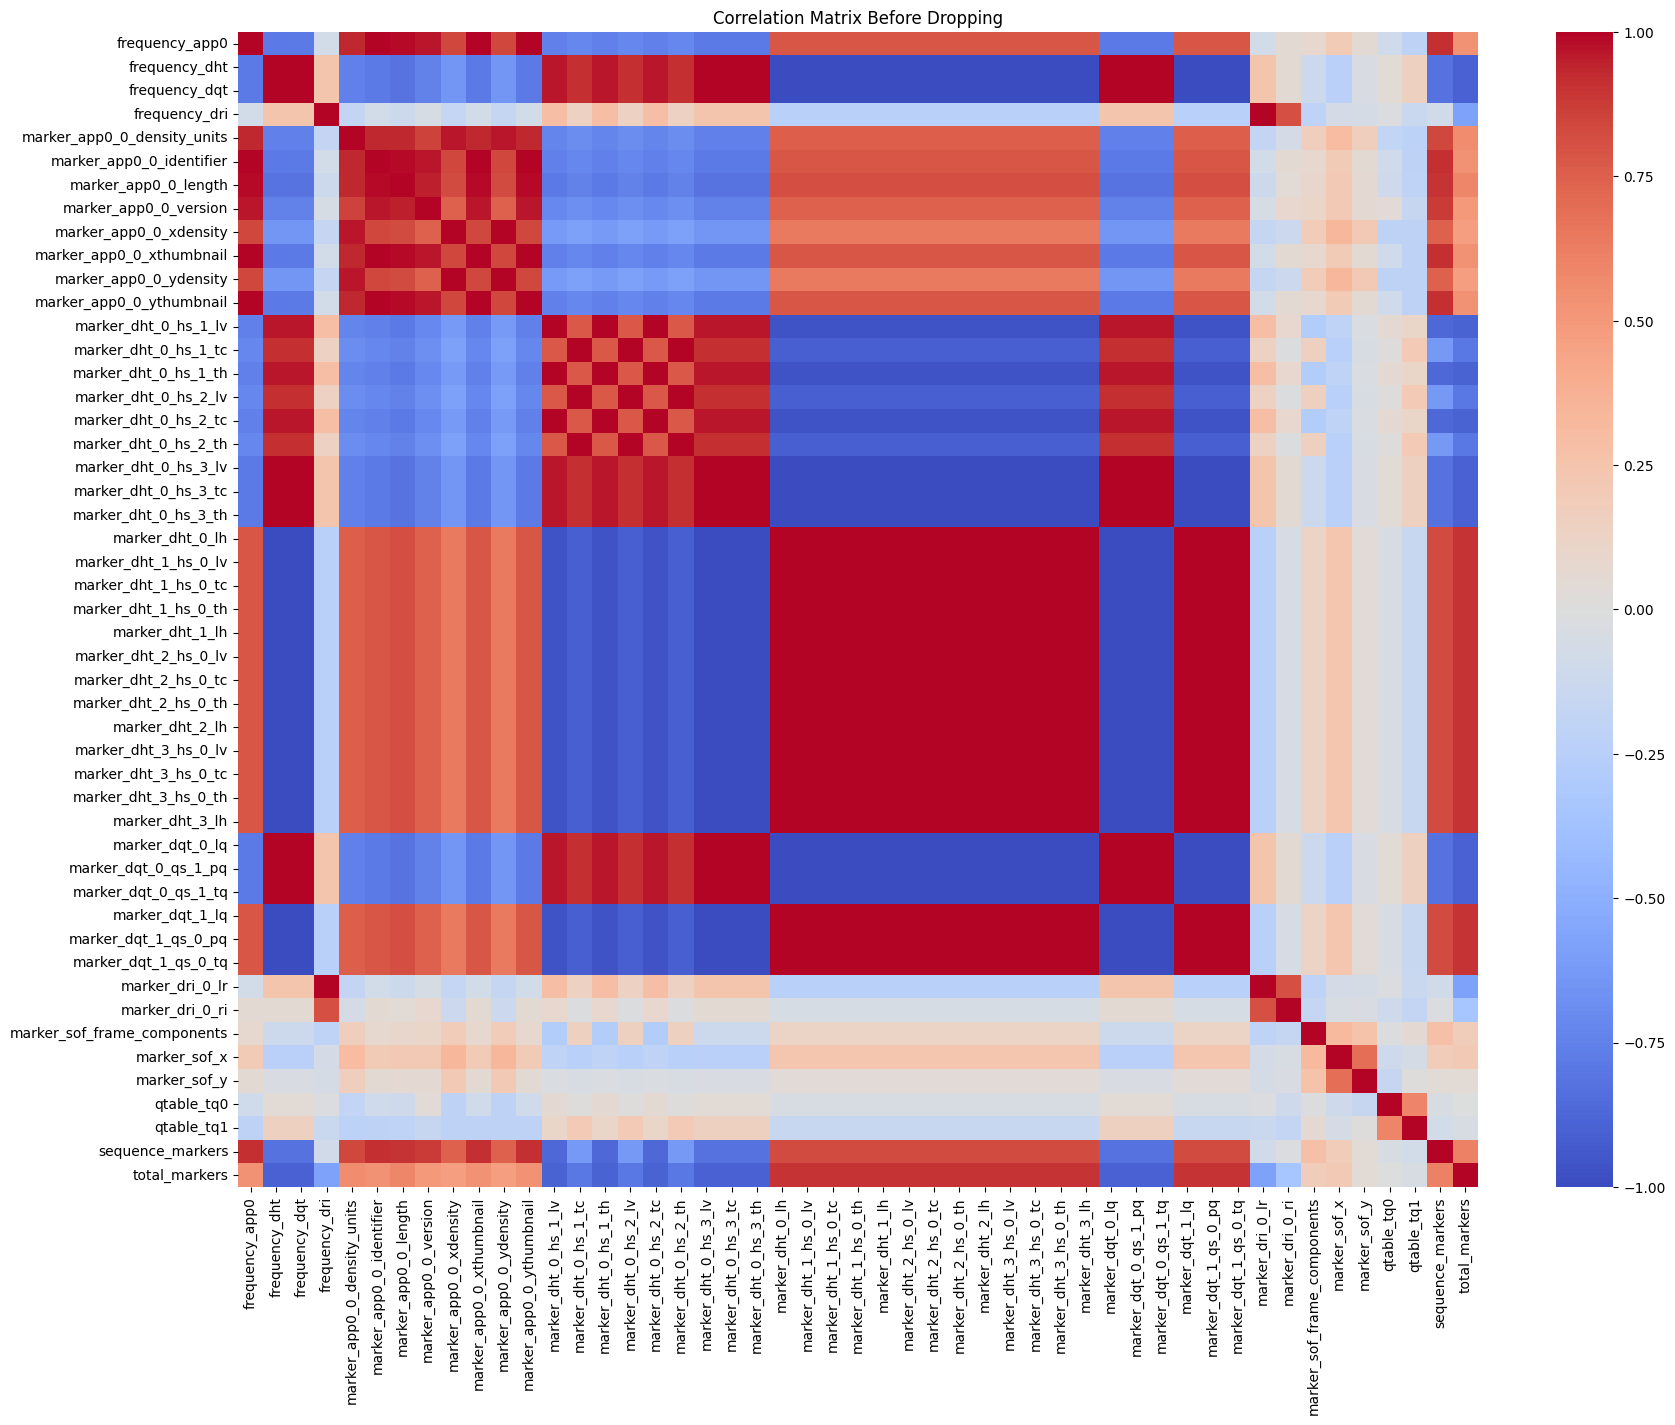

In [16]:
# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

correlation_matrix = X_train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Before Dropping')
plt.show()

Dropped frequency_dht due to high correlation with others
Dropped marker_app0_0_identifier due to high correlation with others
Dropped marker_app0_0_xdensity due to high correlation with others
Dropped marker_dht_0_hs_1_tc due to high correlation with others
Dropped marker_dht_2_hs_0_tc due to high correlation with others
Dropped marker_dht_3_hs_0_lv due to high correlation with others
Dropped frequency_dri due to high correlation with others
Dropped frequency_app0 due to high correlation with others
Dropped marker_app0_0_ydensity due to high correlation with others
Dropped frequency_dqt due to high correlation with others
Dropped marker_dht_0_hs_2_th due to high correlation with others
Dropped marker_dht_0_hs_3_tc due to high correlation with others
Dropped marker_dht_1_hs_0_lv due to high correlation with others
Dropped marker_dht_3_lh due to high correlation with others
Dropped marker_dqt_0_lq due to high correlation with others
Dropped marker_dqt_0_qs_1_pq due to high correlation w

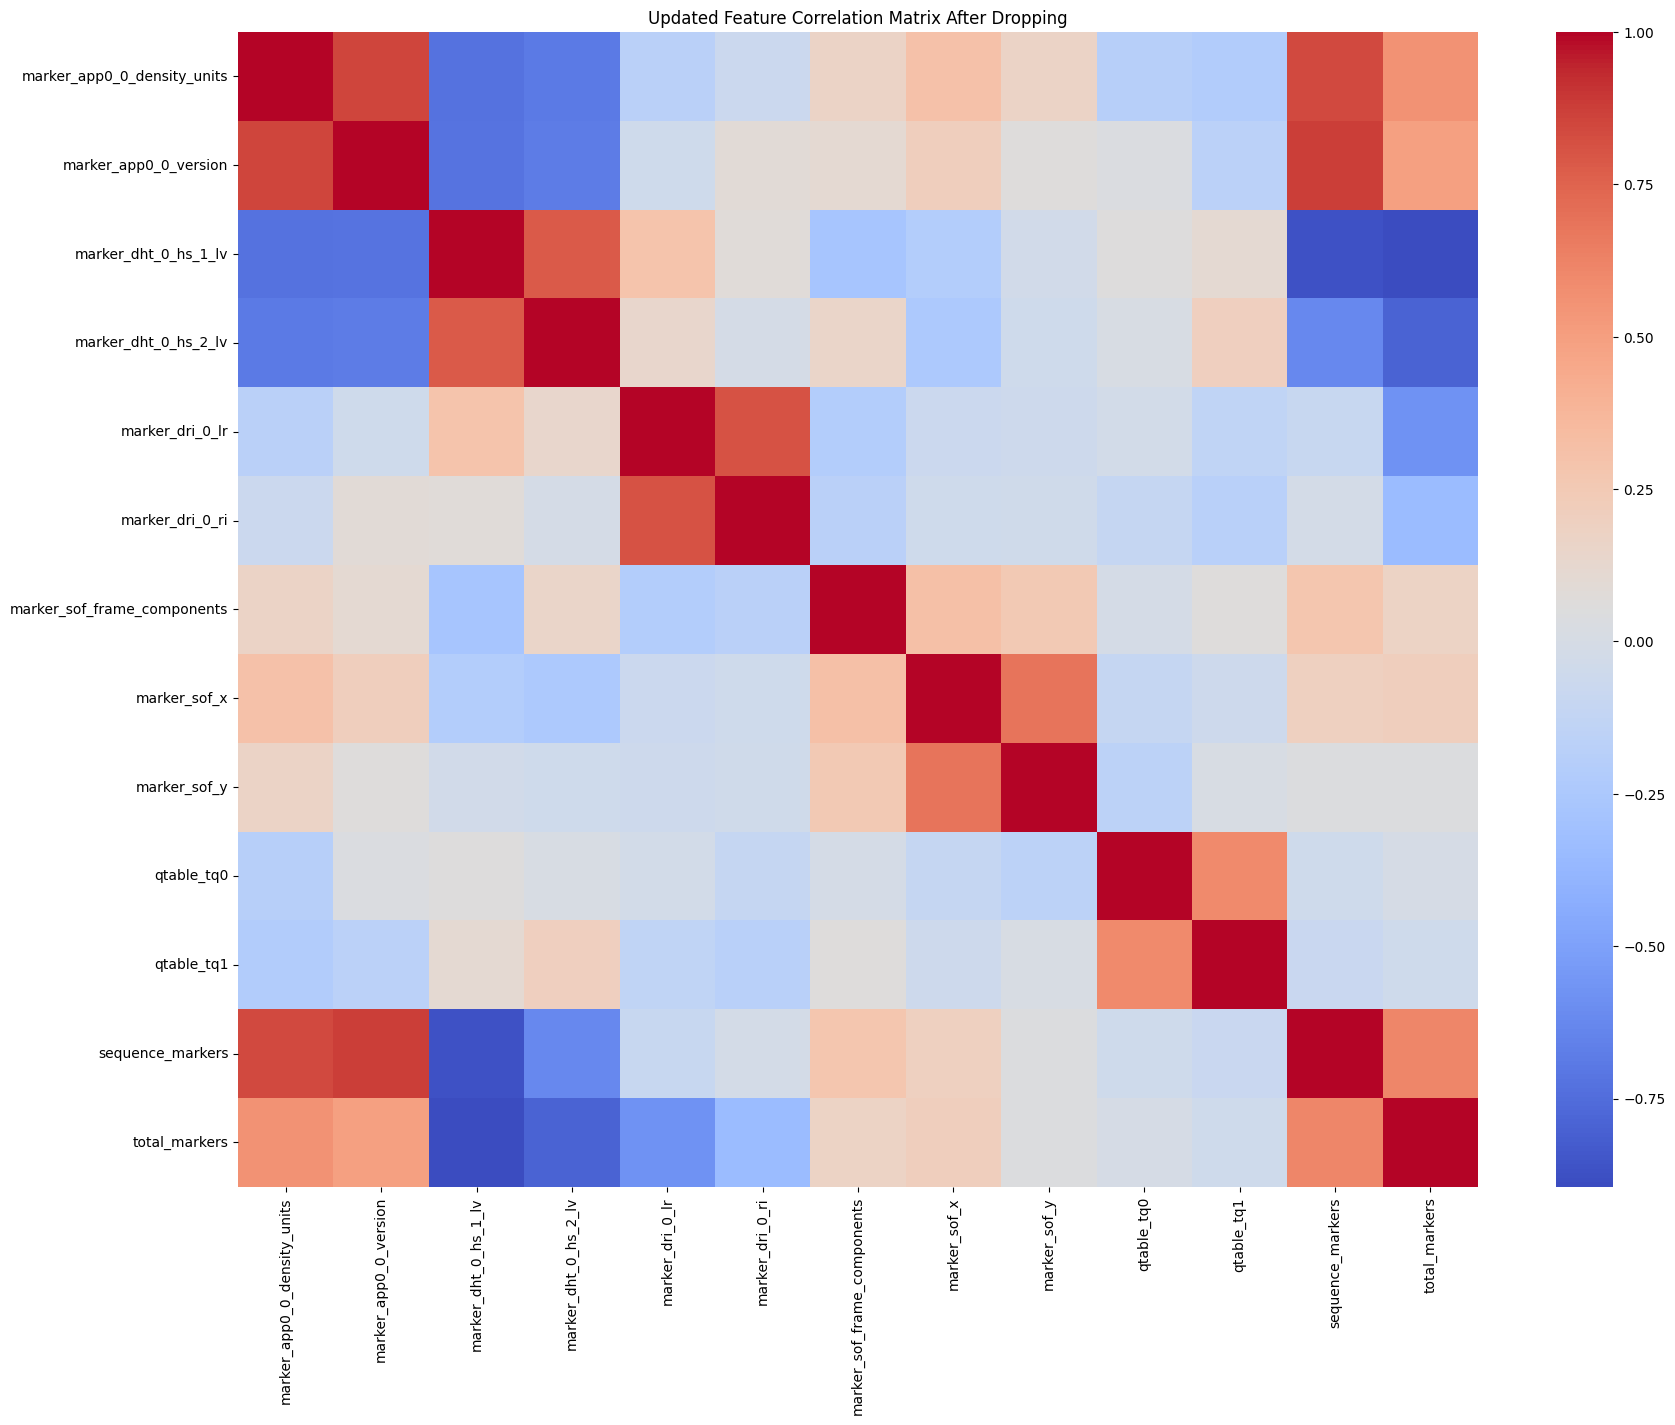

In [17]:
# Remove one item of highly correlated pairs of features according to threshold
# The one to keep is the one with the highest importance

correlation_threshold = 0.95

import numpy as np
import seaborn as sns

# Train a random forest model to determine feature importance
# This is just for preprocessing and is a temporary model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Calculate the correlation matrix
corr_matrix = X_train.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Initialize a set to track dropped columns to avoid modifying DataFrame during iteration
dropped_columns = set()

# While loop to dynamically update correlations and drop features until no highly correlated pairs remain
while True:
    # Recalculate correlation matrix from the modified DataFrame
    corr_matrix = X_train.drop(columns=dropped_columns).corr().abs()
    # Select upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
    # Determine features to drop
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    # Break if no more highly correlated features
    if not to_drop:
        break

    # Drop less important features from each correlated pair
    for column in to_drop:
        correlated_features = upper.index[upper[column] > correlation_threshold].tolist()
        # Identify the least important feature from the correlated pair/group
        if correlated_features:
            # Compare importance and identify the least important
            least_important = sorted([(feature, feature_importances[feature]) for feature in correlated_features + [column]],
                                     key=lambda x: x[1])[0][0]
            # Add least important feature to the set of dropped columns
            if least_important not in dropped_columns:
                dropped_columns.add(least_important)
                print(f"Dropped {least_important} due to high correlation with others")

# Finally, drop all selected features at once
X_train.drop(columns=list(dropped_columns), axis=1, inplace=True)

# Drop the same columns from validation and test sets
X_val.drop(columns=list(dropped_columns), inplace=True)
X_test.drop(columns=list(dropped_columns), inplace=True)

# Check if all datasets have the same columns in the same order
assert list(X_train.columns) == list(X_val.columns) == list(X_test.columns), "Columns are not aligned"

# Retrain the model with the modified DataFrame
model.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
indices = np.argsort(importances)[::-1]

# Get the top 20 most important features
top_features_indices = indices
top_features_importance = importances[top_features_indices]

# Assuming X_train is your DataFrame and it has column names intact
feature_names = X_train.columns

# Print the list of top 20 most important features and their importance values
print("Features by importance (preliminary):")
for i, index in enumerate(top_features_indices):
    # Access the column name using the index
    feature_name = feature_names[index]
    print(f"{feature_name}: Importance {top_features_importance[i]}")

# Re-calculate and plot the correlation matrix to confirm resolution
correlation_matrix = X_train.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Updated Feature Correlation Matrix After Dropping')
plt.show()

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8563 entries, 2312 to 7270
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   marker_app0_0_density_units  8563 non-null   int64
 1   marker_app0_0_version        8563 non-null   int64
 2   marker_dht_0_hs_1_lv         8563 non-null   int64
 3   marker_dht_0_hs_2_lv         8563 non-null   int64
 4   marker_dri_0_lr              8563 non-null   int64
 5   marker_dri_0_ri              8563 non-null   int64
 6   marker_sof_frame_components  8563 non-null   int64
 7   marker_sof_x                 8563 non-null   int64
 8   marker_sof_y                 8563 non-null   int64
 9   qtable_tq0                   8563 non-null   int64
 10  qtable_tq1                   8563 non-null   int64
 11  sequence_markers             8563 non-null   int64
 12  total_markers                8563 non-null   int64
dtypes: int64(13)
memory usage: 936.6 KB


Optimal number of features:  6
Best features with their importance values:
marker_sof_y: 0.2388
marker_sof_x: 0.2232
qtable_tq1: 0.1778
qtable_tq0: 0.1493
sequence_markers: 0.1067
total_markers: 0.1042


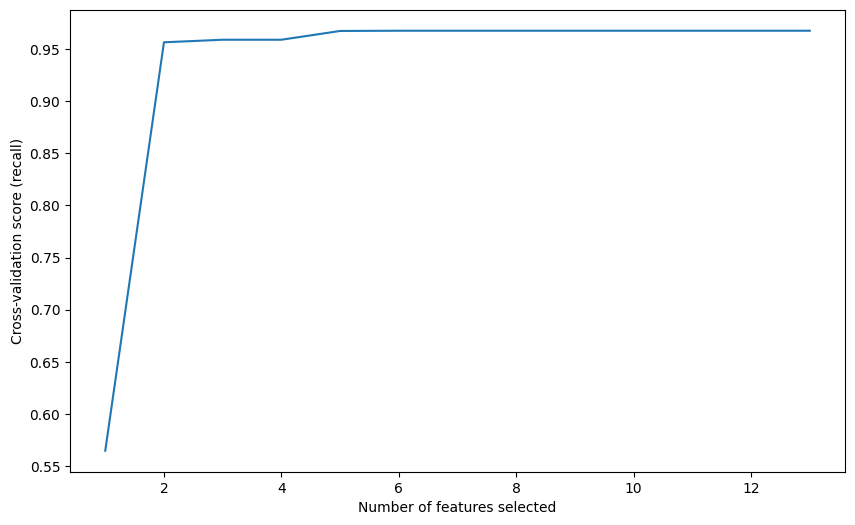

In [19]:
#RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, make_scorer
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt


# Define your model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Create a recall scorer. You can adjust the 'average' parameter as needed:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
# 'macro': Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
recall_scorer = make_scorer(recall_score, average='weighted')  # or 'micro', 'weighted'

# Create an RFECV instance specifying the recall scorer
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5), scoring=recall_scorer)

# Fit RFECV to your data
rfecv.fit(X_train, y_train)

# Get the feature names and their respective importance values
feature_importances = rfecv.estimator_.feature_importances_
best_features = X_train.columns[rfecv.support_]

# Create a list of tuples with feature names and their importances
important_features = list(zip(best_features, feature_importances))

# Sort the features by their importance values in descending order
important_features_sorted = sorted(important_features, key=lambda x: x[1], reverse=True)

# Print the optimal number of features
print("Optimal number of features: ", rfecv.n_features_)

# Print the important features with their importance values in sorted order
print("Best features with their importance values:")
for feature, importance in important_features_sorted:
    print(f"{feature}: {importance:.4f}")

# Plot the CV score as a function of the number of features
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (recall)")
# Use the replacement for grid_scores_ which is cv_results_['mean_test_score']
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Filter the dataset to keep only the optimal features
X_train = X_train[best_features]

# Apply RFECV results to validation set
X_val = X_val[best_features]

# Apply RFECV results to test set
X_test = X_test[best_features]

# Check if all datasets have the same columns in the same order
assert list(X_train.columns) == list(X_val.columns) == list(X_test.columns), "Columns are not aligned"

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8563 entries, 2312 to 7270
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   marker_sof_x      8563 non-null   int64
 1   marker_sof_y      8563 non-null   int64
 2   qtable_tq0        8563 non-null   int64
 3   qtable_tq1        8563 non-null   int64
 4   sequence_markers  8563 non-null   int64
 5   total_markers     8563 non-null   int64
dtypes: int64(6)
memory usage: 468.3 KB


In [21]:
# The original placement of the splitting

In [22]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize and train the Random Forest classifier
#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)

# Predict on the testing set
#y_pred = clf.predict(X_test)

# Calculate accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print(f'Accuracy: {accuracy}')


# Parameter grid
#param_grid = {
#    'n_estimators': [50, 100, 150, 200],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10]
#}

#Middle ground #2
param_grid = {
    'n_estimators': [100, 150, 200],  # Adding an intermediate number of trees
    'max_features': ['sqrt', 3],  # Best performer and an intermediate option
    'max_depth': [None, 20],  # Keeping unlimited and adding a somewhat high limit
    'min_samples_split': [5, 10],  # Intermediate and best previous performer
    'min_samples_leaf': [1, 3],  # Keeping the best and adding one more option
    'bootstrap': [True]  # Based on previous best result
}

# Middle-ground #1
#param_grid = {
#    'n_estimators': [100, 200],  # Reduced number of options
#    'max_features': ['sqrt', 'log2'],  # Reduced complexity
#    'max_depth': [None, 10],  # Allows comparison between limited and unlimited growth
#    'min_samples_split': [2, 10],  # Broader range with fewer options
#    'min_samples_leaf': [1, 4],  # Broader range with fewer options
#    'bootstrap': [True]  # Testing with default bootstrapping
#}

# Expensive #2
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_features': ['sqrt', 'log2', 3, 5],  # Assuming you want to test up to 5 features
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}


# Expensive #1
#param_grid = {
#    'n_estimators': [100, 200, 300],  # More trees can be better, but take longer to compute.
#    'max_features': ['auto', 'sqrt', 'log2'],  # 'auto' uses all features at each split. 'sqrt' and 'log2' reduce overfitting risk.
#    'max_depth': [10, 20, 30, None],  # None means nodes are expanded until all leaves contain less than min_samples_split samples.
#    'min_samples_split': [2, 10, 20],  # Larger numbers reduce model complexity.
#    'min_samples_leaf': [1, 4, 10]  # Increasing this number ensures that nodes generalize better.
#}


# Create a recall scorer for multiclass classification
recall_scorer = make_scorer(recall_score, average='weighted')  # or 'micro' or 'weighted' depending on your need


# Create the GridSearchCV object
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=StratifiedKFold(5), scoring=recall_scorer)
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Execute the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("Test set accuracy:", test_accuracy)
print("Test set precision:", test_precision)
print("Test set recall:", test_recall)
print("Test set F1-score:", test_f1)


#Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
#Best cross-validated score: 0.7180897452684529
#Test set accuracy: 0.715219421101774

# Target: prov
# Parameter grid: Middle-ground #2
# All decollerated features
#Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
#Best cross-validated score: 1.0
#Test set accuracy: 1.0
#Test set precision: 1.0
#Test set recall: 1.0
#Test set F1-score: 1.0


# Target: Model
# Parameter grid: Middle-ground #2
# only qtables and dimension, scorer=recall
#Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
#Best cross-validated score: 0.7180897452684529
#Test set accuracy: 0.715219421101774
#Test set precision: 0.6288856513200001
#Test set recall: 0.715219421101774
#Test set F1-score: 0.6511216397237181

# Target: Model
# Parameter grid: Middle-ground #2
#Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
#Best cross-validated score: 0.7465837793454124
#Test set accuracy: 0.7404295051353875

# Target: Model
# Parameter grid: Middle-ground #1
#Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
#Best cross-validated score: 0.7461170352063113
#Test set accuracy: 0.7404295051353875


# Target: prov
#Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
#Best cross-validated score: 1.0
#Test set accuracy: 1.0

# Target: prov
# Same parameters as above, but removing the four most important features
# Test set accuracy: 0.9878840328861964

# Target: prov
# df.drop(['qtable_tq1', 'qtable_tq0', 'marker_sof2_0_y', 'marker_sof2_0_x'], axis=1, inplace=True)
#Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
#Best cross-validated score: 0.9834452615727975
#Test set accuracy: 0.9896148853310255

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated score: 0.968235347071051
Test set accuracy: 0.9551820728291317
Test set precision: 0.9621888359752439
Test set recall: 0.9551820728291317
Test set F1-score: 0.9554783716480654


In [23]:
# Train The Random Forest model
# Assuming 'best_model' is the model trained with the best parameters from the grid search in the previous cell

rf_classifier = best_model
#rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=50, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

scores = cross_val_score(rf_classifier, X_train, y_train, cv=StratifiedKFold(5))
print("Re-evaluated cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

y_pred_test = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test set accuracy:", test_accuracy)

y_pred_val = rf_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation set accuracy:", val_accuracy)



# Train the Random Forest model
# Import RandomForestClassifier and cross_val_score from sklearn

# Use cross-validation to evaluate the model
#rf_classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, n_estimators=50, random_state=42)
#scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation


# Final model training and evaluation
#rf_classifier.fit(X_train, y_train)

#y_pred_test = rf_classifier.predict(X_test)  # Test set
#y_pred_val = rf_classifier.predict(X_val)  # Validation set

Re-evaluated cross-validation scores: [0.97022767 0.96614127 0.96906013 0.96553738 0.97021028]
Mean cross-validation score: 0.968235347071051
Test set accuracy: 0.9551820728291317
Validation set accuracy: 0.9644859813084112


Confusion Matrix:
[[151   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  16   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  15   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  82   0   8   0  10   0   0   0   0   0]
 [  0   0   0   0 148   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  82   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  10   0   0   0   0   0   0]
 [  0   0   0   0   0  14   0  92  15   0   0   0   0]
 [  0   0   0   0   0   0   0   1  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 250   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  39   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 100]]


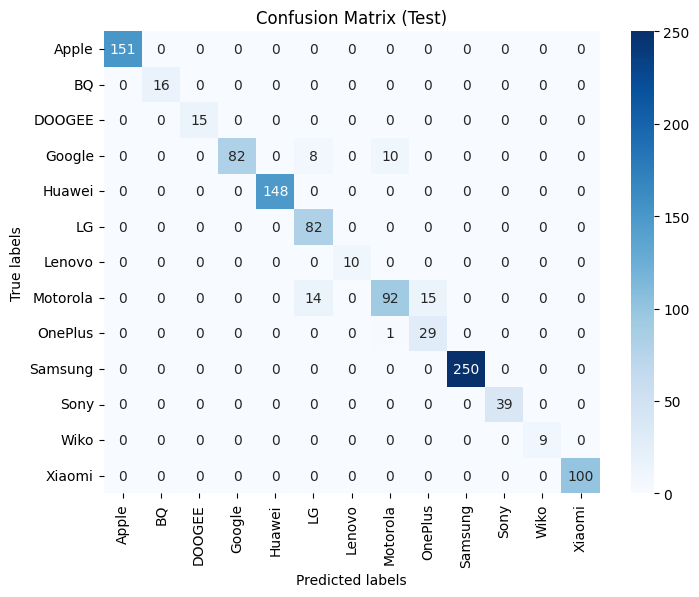


Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       151
          BQ       1.00      1.00      1.00        16
      DOOGEE       1.00      1.00      1.00        15
      Google       1.00      0.82      0.90       100
      Huawei       1.00      1.00      1.00       148
          LG       0.79      1.00      0.88        82
      Lenovo       1.00      1.00      1.00        10
    Motorola       0.89      0.76      0.82       121
     OnePlus       0.66      0.97      0.78        30
     Samsung       1.00      1.00      1.00       250
        Sony       1.00      1.00      1.00        39
        Wiko       1.00      1.00      1.00         9
      Xiaomi       1.00      1.00      1.00       100

    accuracy                           0.96      1071
   macro avg       0.95      0.97      0.95      1071
weighted avg       0.96      0.96      0.96      1071

Confusion Matrix (Validation):
[[148   0   0   0   0   

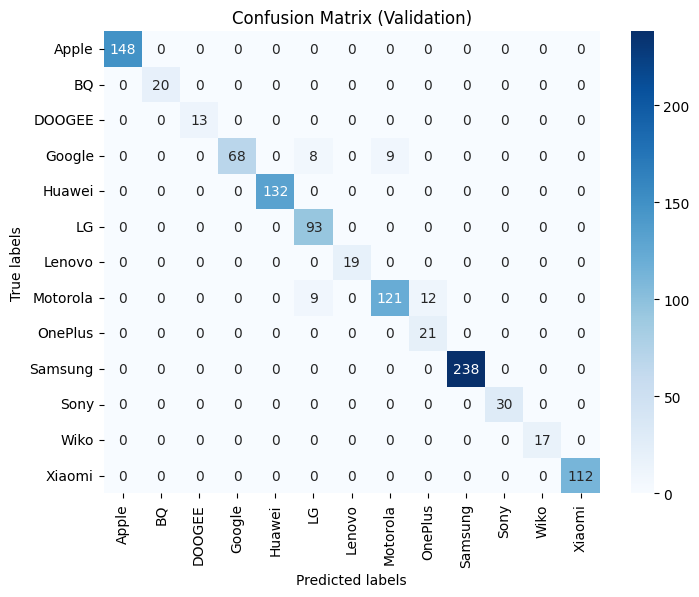


Classification Report (Validation):
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00       148
          BQ       1.00      1.00      1.00        20
      DOOGEE       1.00      1.00      1.00        13
      Google       1.00      0.80      0.89        85
      Huawei       1.00      1.00      1.00       132
          LG       0.85      1.00      0.92        93
      Lenovo       1.00      1.00      1.00        19
    Motorola       0.93      0.85      0.89       142
     OnePlus       0.64      1.00      0.78        21
     Samsung       1.00      1.00      1.00       238
        Sony       1.00      1.00      1.00        30
        Wiko       1.00      1.00      1.00        17
      Xiaomi       1.00      1.00      1.00       112

    accuracy                           0.96      1070
   macro avg       0.95      0.97      0.96      1070
weighted avg       0.97      0.96      0.96      1070



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'column' is the name of the label/target feature that was label-encoded
column = target_feature  # replace 'your_label_column_here' with the actual target feature column name

# Inverse transform the encoded predictions and test labels
y_pred_test_readable = label_encoders[column].inverse_transform(y_pred_test)
y_test_readable = label_encoders[column].inverse_transform(y_test)

# Output the confusion matrix for the test set
print('Confusion Matrix:')
conf_matrix_test = confusion_matrix(y_test_readable, y_pred_test_readable)
print(conf_matrix_test)

# Get the class labels for the confusion matrix
class_labels = label_encoders[column].classes_

# Plot the heatmap for the confusion matrix of the test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Confusion Matrix (Test)')
plt.show()

# Output the classification report for the test set
print('\nClassification Report:')
print(classification_report(y_test_readable, y_pred_test_readable))

# If you also want to display this for the validation set, you can do the following:
y_pred_val_readable = label_encoders[column].inverse_transform(y_pred_val)
y_val_readable = label_encoders[column].inverse_transform(y_val)  # Assuming y_val is also encoded

# Output the confusion matrix for the validation set
print('Confusion Matrix (Validation):')
conf_matrix_val = confusion_matrix(y_val_readable, y_pred_val_readable)
print(conf_matrix_val)

# Plot the heatmap for the confusion matrix of the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Confusion Matrix (Validation)')
plt.show()

# Output the classification report for the validation set
print('\nClassification Report (Validation):')
print(classification_report(y_val_readable, y_pred_val_readable))


# Target: Model
# with only qtables and dimension and sequence markers (5 features)
#           accuracy                           0.76      1071
#          macro avg       0.69      0.72      0.68      1071
#       weighted avg       0.70      0.76      0.70      1071

# Target: Model
# with only qtables and dimension (4 features)
#           accuracy                           0.72      1071
#          macro avg       0.62      0.70      0.64      1071
#       weighted avg       0.63      0.72      0.65      1071




#y_pred = clf.predict(X_test)
#print('confusion_matrix:')
#print(confusion_matrix(y_test, y_pred))
#print('\nclassification_report:')
#print(classification_report(y_test, y_pred))

Feature Importances:
marker_sof_y: Importance 0.22961734997375313
marker_sof_x: Importance 0.22727040886901131
qtable_tq1: Importance 0.1798750274215571
qtable_tq0: Importance 0.1522473073098394
total_markers: Importance 0.11029157699772964
sequence_markers: Importance 0.10069832942810927


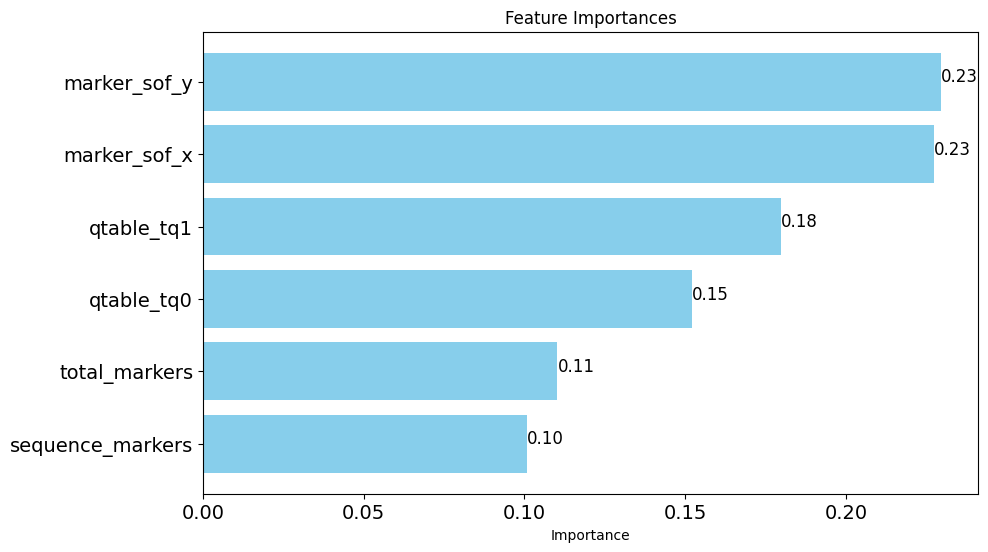

In [25]:
# Feature importance

# Assuming 'rf_classifier' is your trained RandomForest model
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort features by importance

# Retrieve the names of all features sorted by their importance
feature_names = X_train.columns[indices]
sorted_importances = importances[indices]

# Print the list of all features sorted by their importance values
print("Feature Importances:")
for name, importance in zip(feature_names, sorted_importances):
    print(f"{name}: Importance {importance}")

'''
# Plotting all feature importances
plt.figure(figsize=(20, max(6, len(feature_names) * 0.3)))  # Dynamically size the plot height based on number of features
plt.title('Feature Importances')
plt.bar(feature_names, sorted_importances, color='b', align='center')
plt.xticks(rotation=90)  # Rotate feature names for readability, especially useful for large number of features
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
'''
plt.figure(figsize=(10, max(6, len(feature_names) * 0.3)))  # Dynamically size the plot height based on number of features
plt.barh(feature_names, sorted_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y axis to have the highest values on top if preferred
plt.tick_params(axis='both', which='major', labelsize=14)
# Adding the labels on the bars
for index, value in enumerate(sorted_importances):
    plt.text(value, index, f'{value:.2f}', fontsize=12)

plt.show()
# Optional: Validate feature importance using permutation importance on the validation set
#if X_val is not None:
#    perm_importance = permutation_importance(rf_classifier, X_val, y_val, n_repeats=10, random_state=42)
#    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
#    plt.figure(figsize=(20, max(6, len(X_val.columns) * 0.3)))
#    plt.bar(X_val.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color='g')
#    plt.title('Permutation Importances (validation set)')
#    plt.xticks(rotation=90)
#    plt.xlabel('Feature')
#    plt.ylabel('Importance Score')
#    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


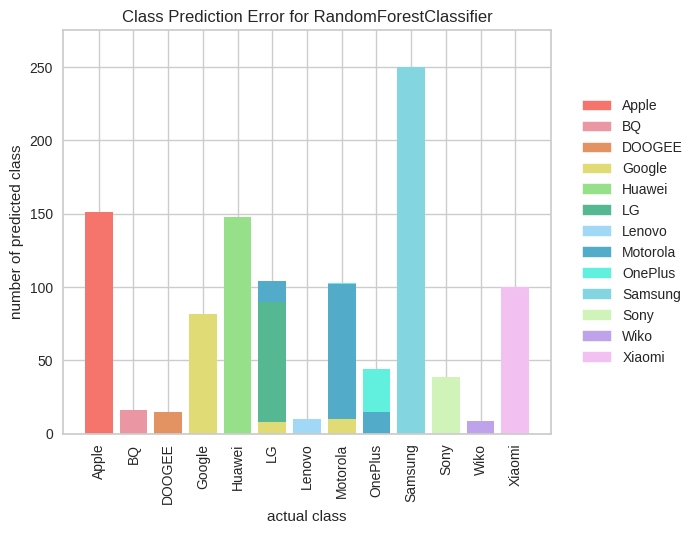

In [27]:
from yellowbrick.classifier import ClassPredictionError
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming 'rf_classifier', 'X_train', 'y_train', 'X_test', and 'y_test' are already defined

#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Define a list of colors with as many distinct colors as there are classes
'''colors = ["#F5756D", "#EA96A3", "#E39361","#E0DB74",
          "#96E08A","#55B892", "#A0D8F5","#52ACC9","#60F0DD",
          "#83D5E0", "#8DAEE7", "#BFA3EA", "#F2C1F2", "#DB89B8"
        ]
'''
colors = ["#F5756D", "#EA96A3", "#E39361","#E0DB74",
          "#96E08A","#55B892", "#A0D8F5","#52ACC9","#60F0DD",
          "#83D5E0", "#CFF3B8","#BFA3EA", "#F2C1F2", "#DB89B8"
        ]

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Assuming 'column' holds the target feature that was label-encoded
column = target_feature  # replace with your actual target feature column name
label_encoder = label_encoders[column]  # ensure this is the LabelEncoder used for 'column'

# Get all unique encoded classes in y_train and inverse transform them
unique_encoded_classes = np.unique(y_train)
unique_classes_readable = label_encoder.inverse_transform(unique_encoded_classes)

# Initialize the visualization with readable class labels and custom colors
visualizer = ClassPredictionError(rf_classifier, classes=unique_classes_readable, colors=colors)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  # The visualizer uses the fitted model

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Finalize and render the figure
visualizer.show()



# Check if all datasets have the same columns in the same order
assert list(X_train.columns) == list(X_val.columns) == list(X_test.columns), "Columns are not aligned"


# class prediction error
#from yellowbrick.classifier import ClassPredictionError

# Initialize the visualization
#visualizer = ClassPredictionError(rf_classifier, classes=[0, 1, 2, 3, 4, 5])

# Fit the training data to the visualizer
#visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
#visualizer.score(X_test, y_test)

# Finalize and render the figure
#visualizer.show()